In [1]:
# Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore') 

In [3]:
# Reading the dataset
data = pd.read_csv('loan_data.csv')

In [4]:
# Having a look at the data
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [5]:
# Basic Info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [6]:
# Describing the data
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [7]:
data.Gender.unique()

array(['Male', 'Female', nan], dtype=object)

In [8]:
# Replacing the null values of gender with the most frequent value	
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])

In [9]:
# Replacing the null values of Dependents with the most frequent value
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])

In [10]:
# Replacing the null values of Self Employed with the most frequent value
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [11]:
# Replacing the null values of Loan Amount Term with the most frequent value
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0])

In [12]:
# Replacing the null values of Credit History with the most frequent value
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [13]:
# Basic Info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             381 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         381 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      381 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   381 non-null    float64
 10  Credit_History     381 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [14]:
# To check for duplicates
data.duplicated().sum()

0

In [15]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
loan_status_encoded = label_encoder.fit_transform(data['Loan_Status'])

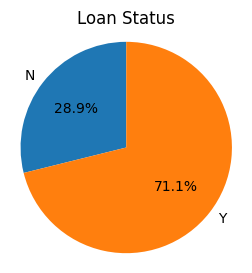

In [16]:
# Data Visualization of the dependent variable
plt.figure(figsize=(3,3))
plt.pie([sum(loan_status_encoded==0), sum(loan_status_encoded==1)], labels=label_encoder.classes_, autopct='%1.1f%%', startangle=90)
plt.title('Loan Status')
plt.axis('equal')
plt.show()

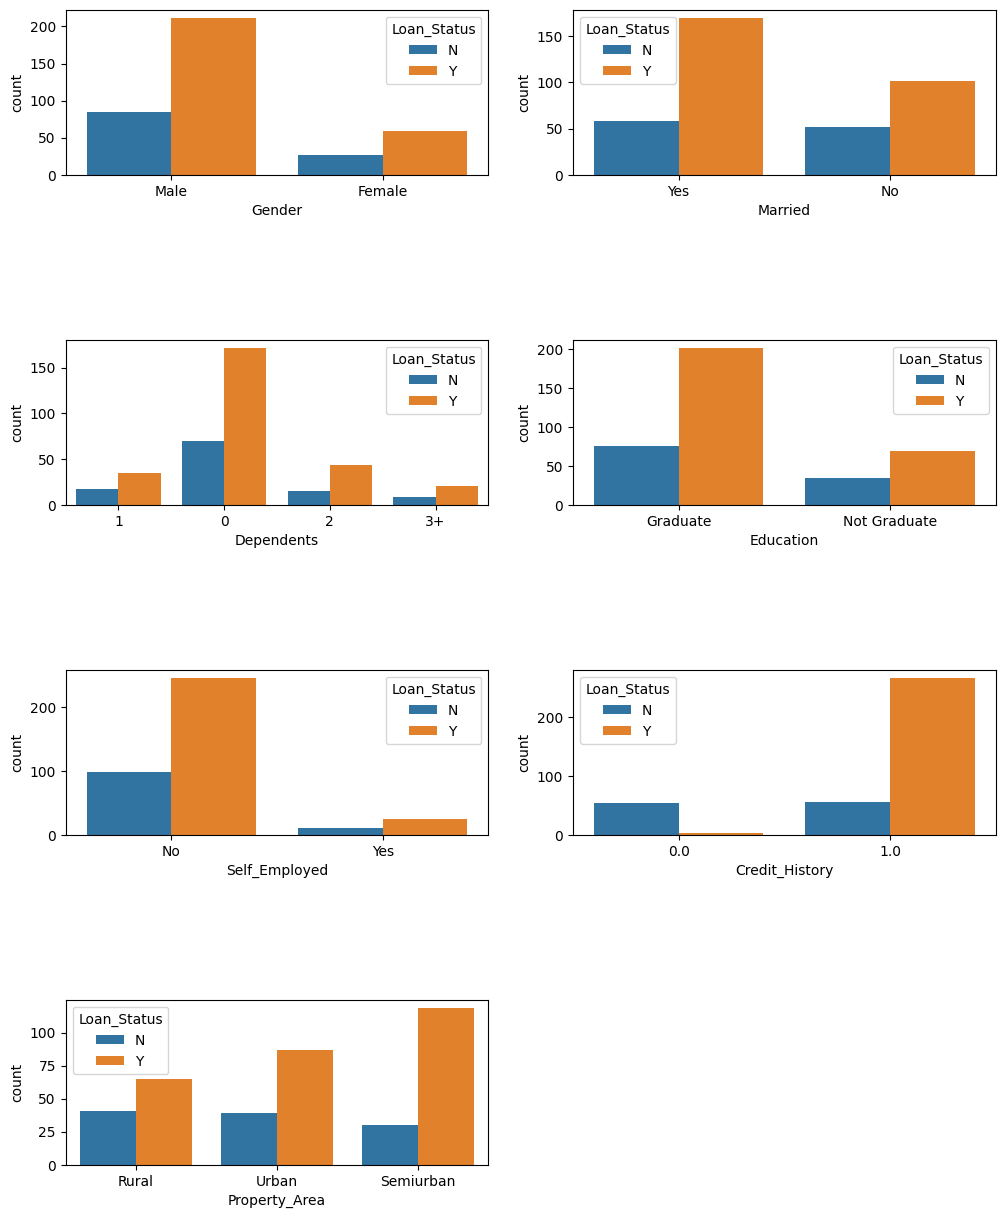

In [17]:
c_variables = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Credit_History',
              'Property_Area']
fig, ax = plt.subplots(4, 2, figsize=(12,15))

for index, cat_col in enumerate(c_variables):
    row, col = index//2, index%2
    sns.countplot(x=cat_col, data=data, hue='Loan_Status',ax=ax[row, col])
    
# Hide the empty subplot
fig.delaxes(ax.flatten()[len(c_variables)])

plt.subplots_adjust(hspace=1)

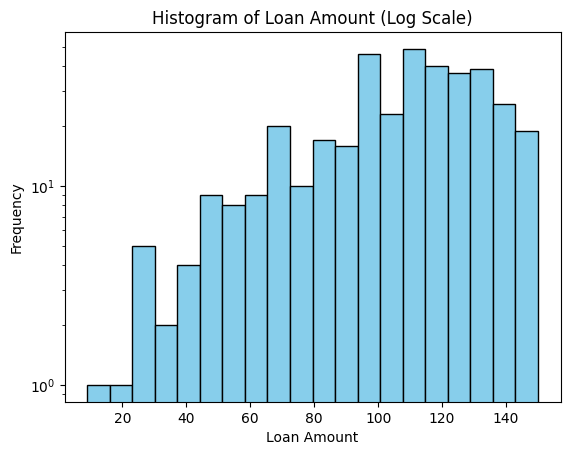

In [18]:
# Create a histogram of 'LoanAmount' with log scale
plt.hist(data['LoanAmount'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Loan Amount (Log Scale)')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()

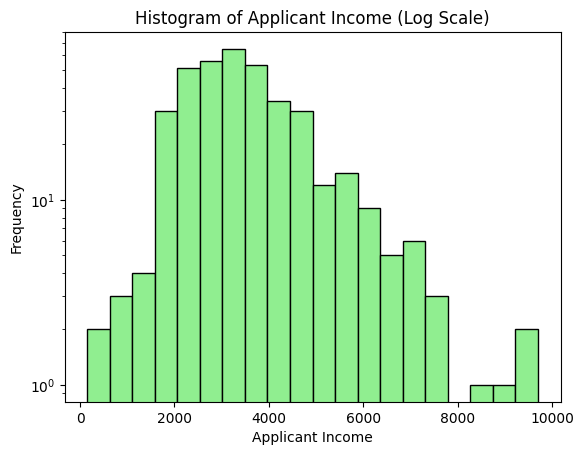

In [19]:
# Create a histogram of 'ApplicantIncome' with log scale
plt.hist(data['ApplicantIncome'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Histogram of Applicant Income (Log Scale)')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()

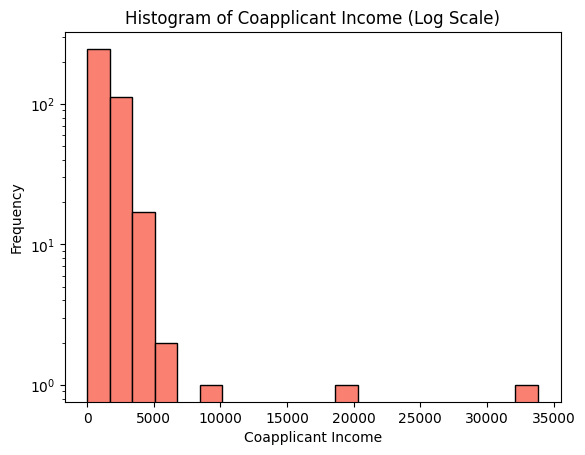

In [20]:
# Create a histogram of 'CoapplicantIncome' with log scale
plt.hist(data['CoapplicantIncome'], bins=20, color='salmon', edgecolor='black')
plt.title('Histogram of Coapplicant Income (Log Scale)')
plt.xlabel('Coapplicant Income')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()

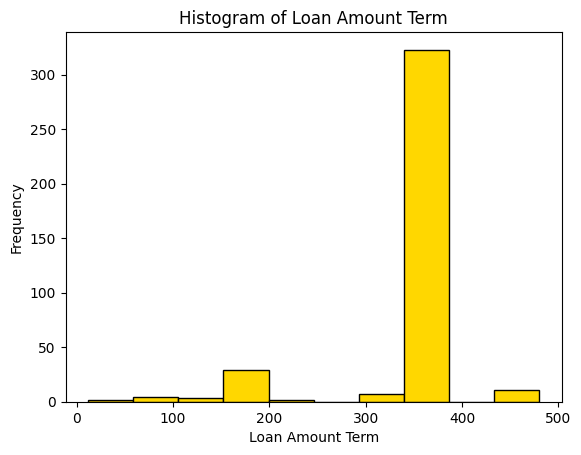

In [21]:
# Create a histogram of 'Loan_Amount_Term'
plt.hist(data['Loan_Amount_Term'], bins=10, color='gold', edgecolor='black')
plt.title('Histogram of Loan Amount Term')
plt.xlabel('Loan Amount Term')
plt.ylabel('Frequency')
plt.show()

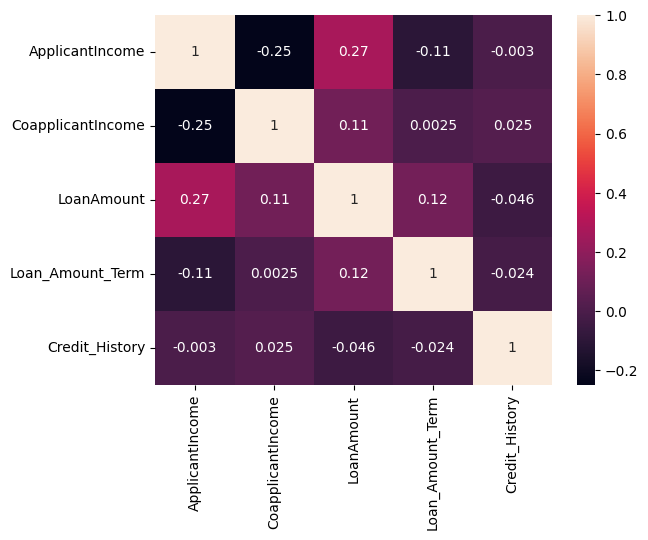

In [22]:
#plotting the heatmap for correlation
ax = sns.heatmap(data.corr(), annot=True)